<a href="https://colab.research.google.com/github/s14990/PIBD_Project1/blob/main/UMBD_P1_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


data_raw = pd.read_csv('https://drive.google.com/uc?id=1RF5iC-X6sbKLFf2LjLhwuTwGrPuxBMTn')
data_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Wstępna analiza

In [ ]:
!pip install sweetviz -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.4 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning:

Report Analyze_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



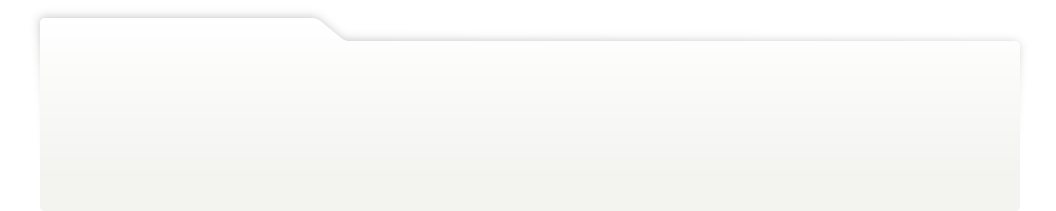
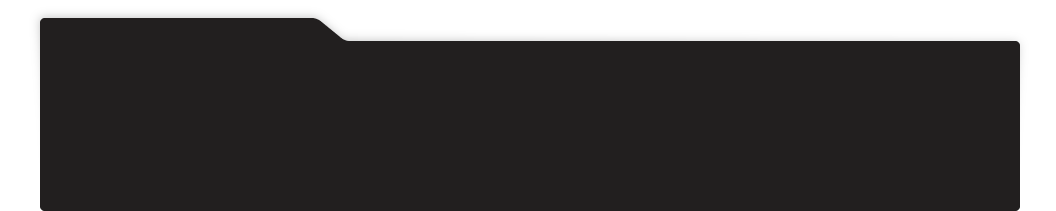
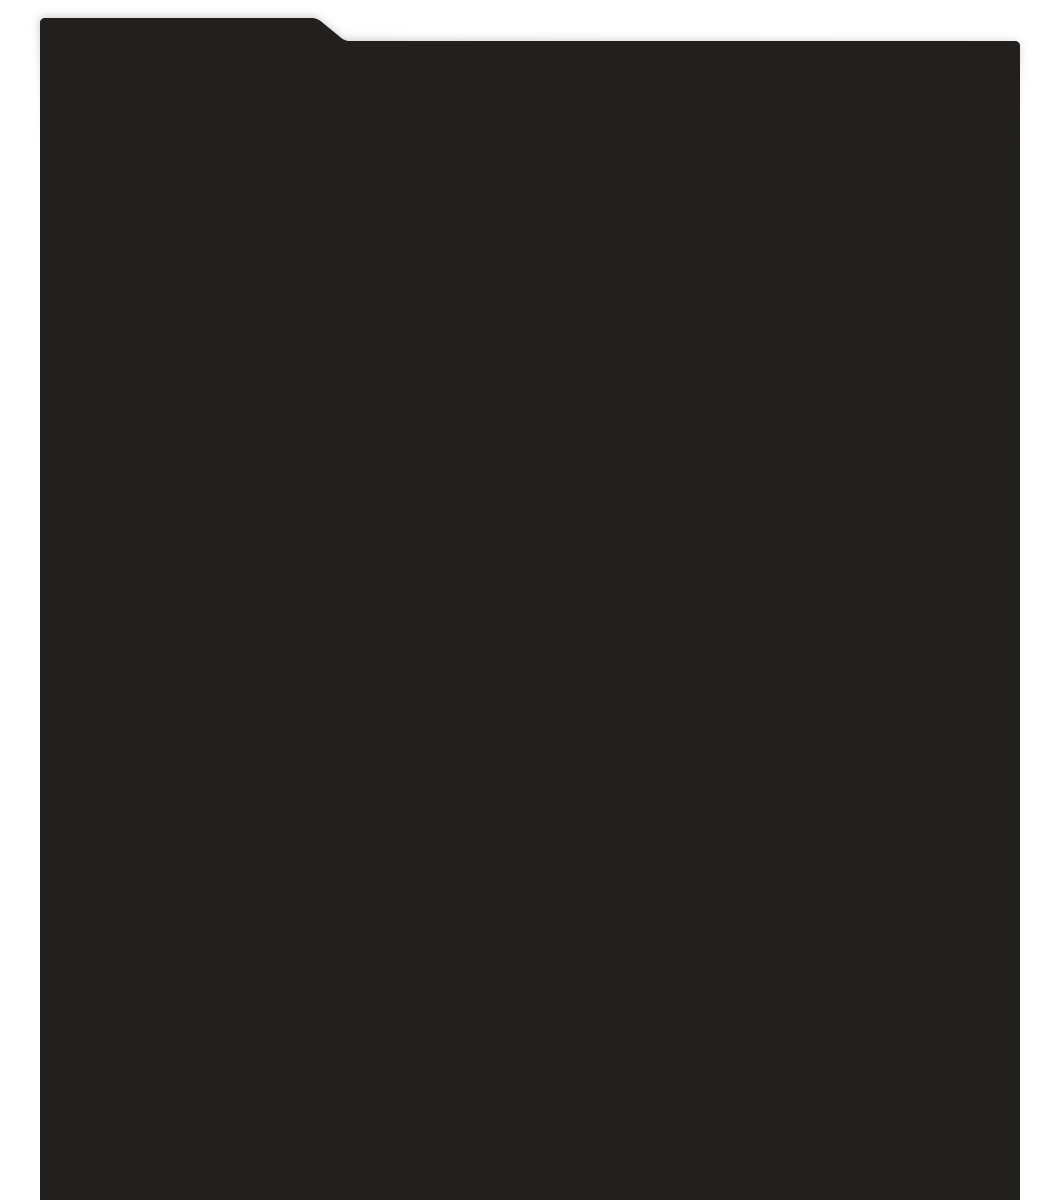
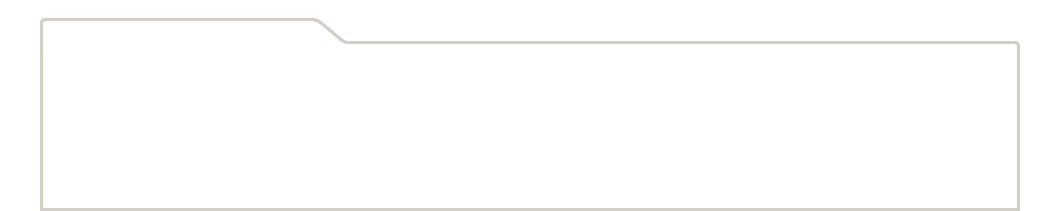
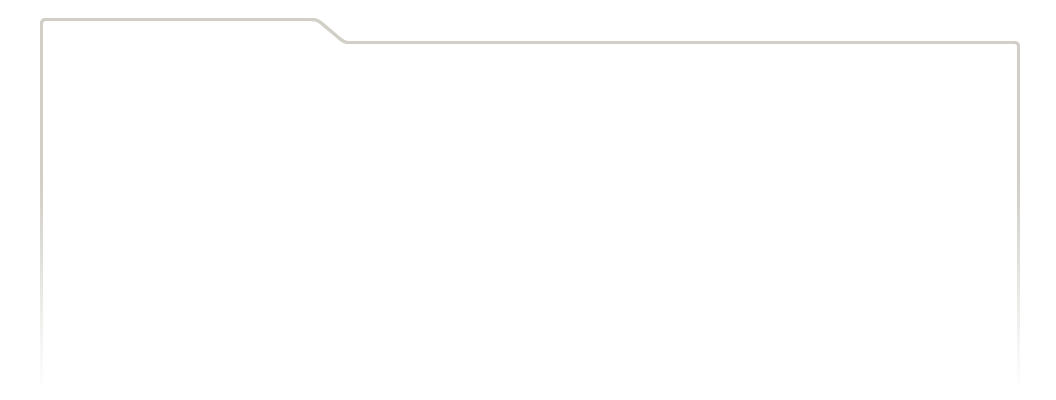
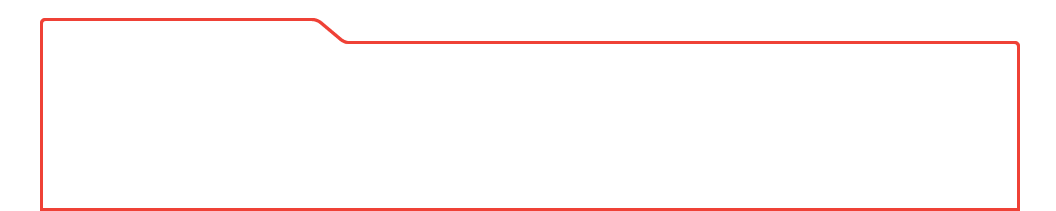
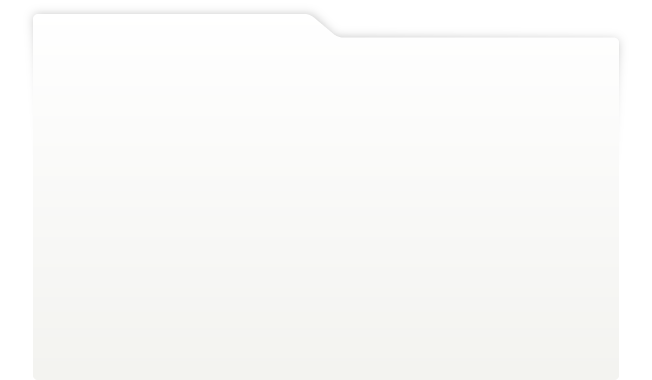
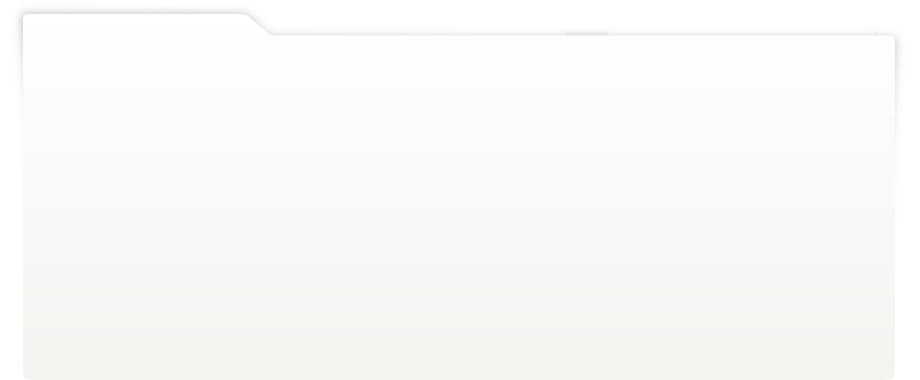
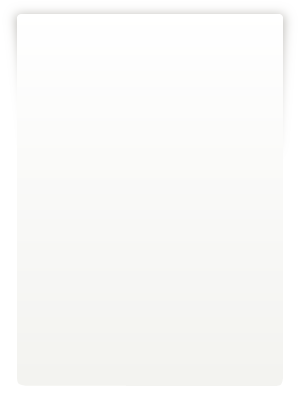
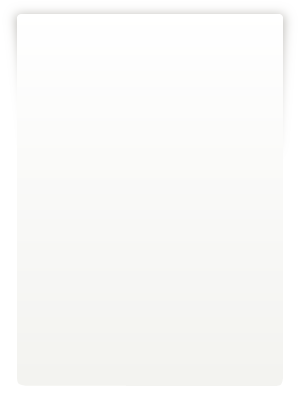
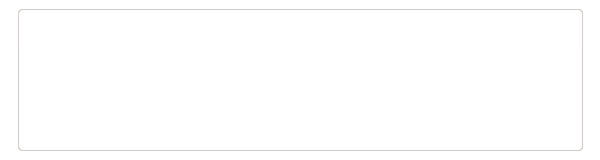
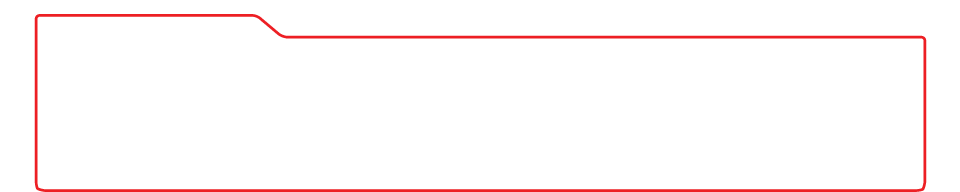
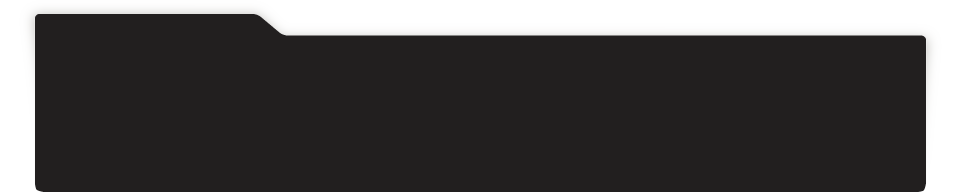
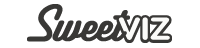
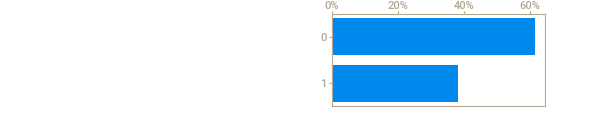
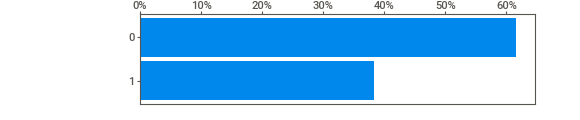
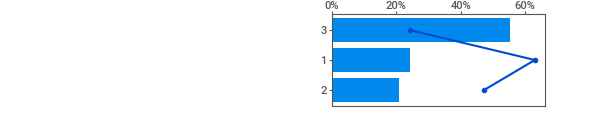
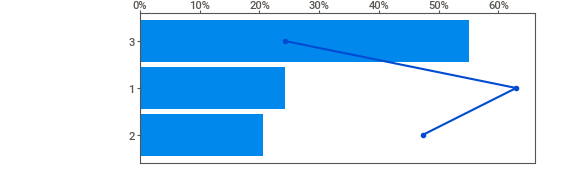
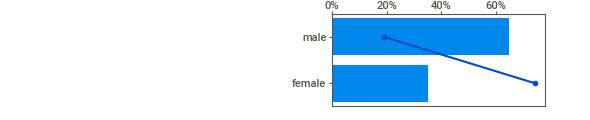
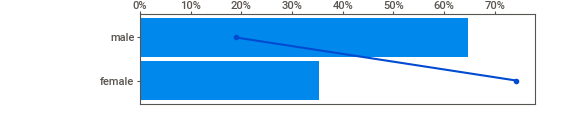
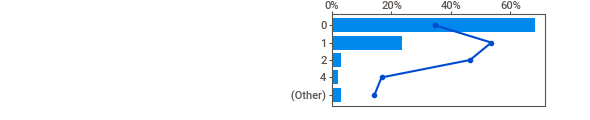
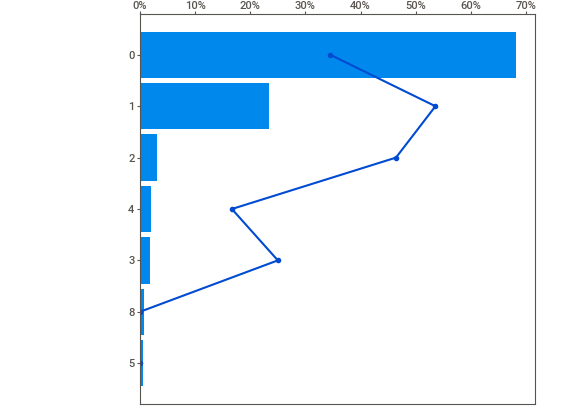
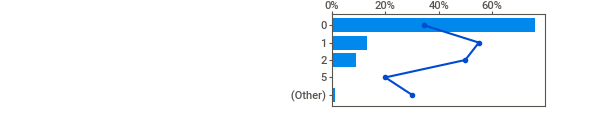
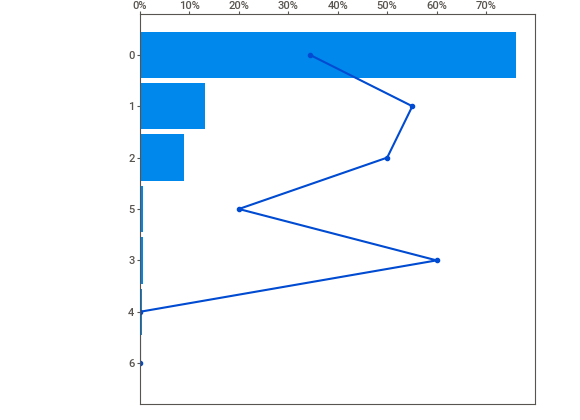
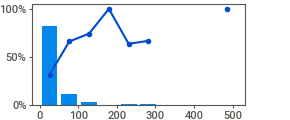
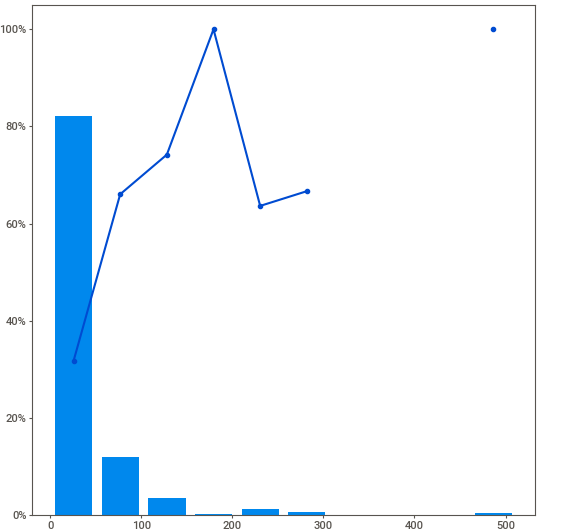
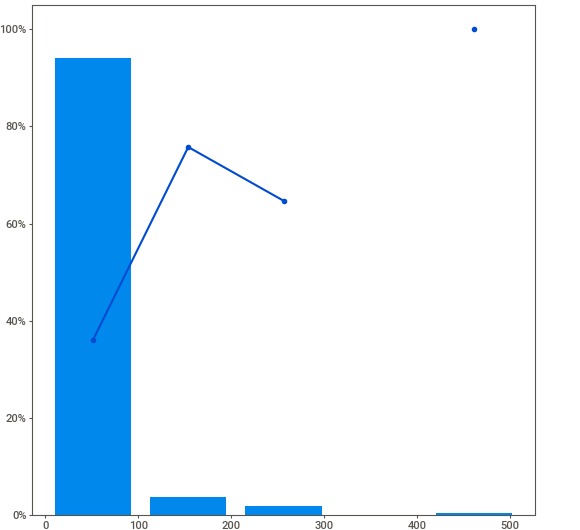
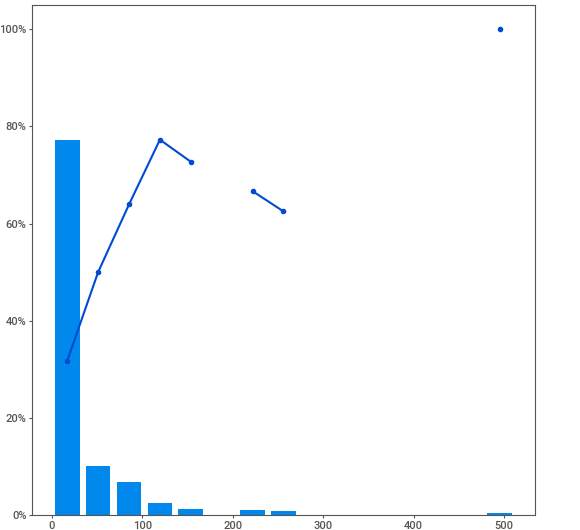
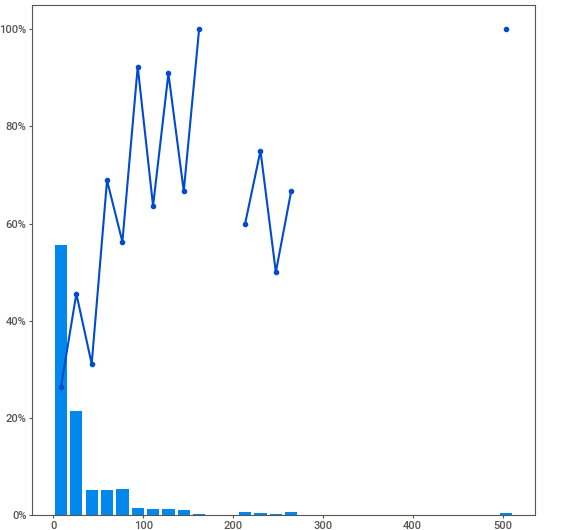
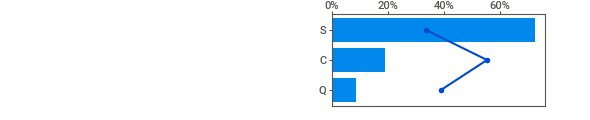
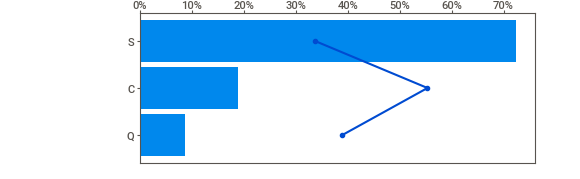
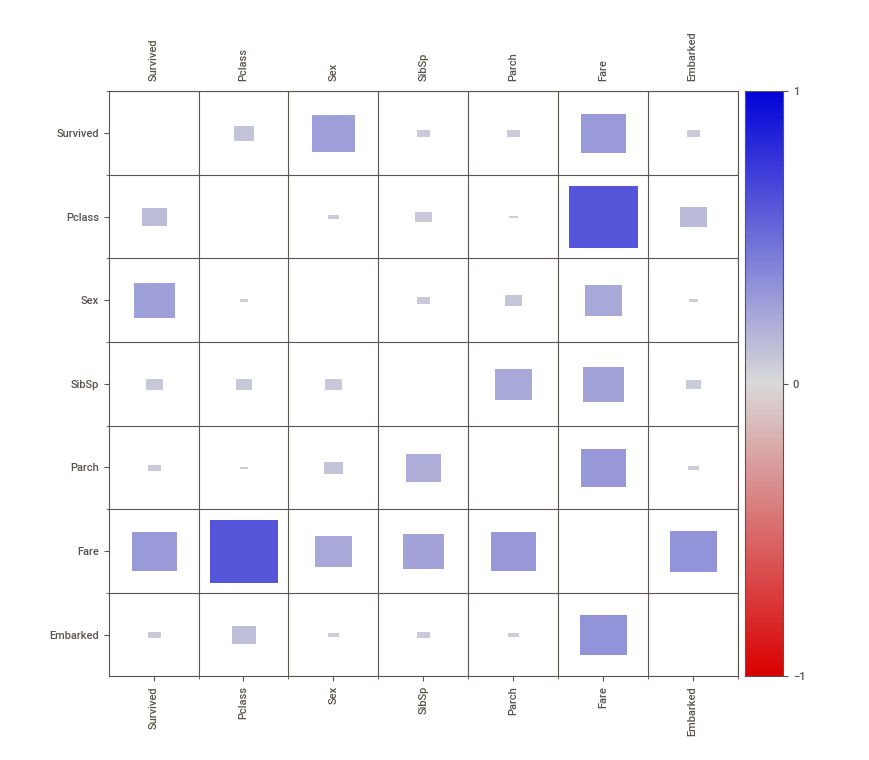
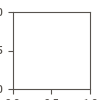

In [ ]:
import sweetviz as sv
sv.config_parser.read("Override.ini")
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])
analyze_report = sv.analyze([data_raw,'Train'], 'Survived',  feature_config)
analyze_report.show_html(filepath='Analyze_report.html', layout='vertical', scale=None)
analyze_report.show_notebook()

Kolumny Ticket, Cabin można usunąć.

Ładowanie danych oraz stworzenie pipeline dla transformacji kolumn.

Kategorije na 0-1, skalowanie oraz uzupełnienie brakujących wartości.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train = data_raw.drop(['Survived','Name','Ticket','PassengerId', 'Cabin'], axis=1)
y_train = data_raw['Survived']

num_features = ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Pclass', 'Sex', 'Embarked']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X_train_preprocessed = pipeline.fit_transform(X_train)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])]))])

Wybór parametrów drzew za pomocą GridSearchCV.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 2, 3, 5, 10],
    'classifier__min_samples_split': [10, 20, 30],
    'classifier__min_samples_leaf': [5, 10, 15, 10]
}

grid_search_tree = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Results ", pd.concat([pd.DataFrame(grid_search_tree.cv_results_["params"]),pd.DataFrame(grid_search_tree.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by=['Accuracy']).head(10))
print("Best hyperparameters: ", grid_search_tree.best_params_)
print("Best score: ", grid_search_tree.best_score_)

Results     classifier__criterion  classifier__max_depth  classifier__min_samples_leaf  \
83               entropy                    2.0                            10   
20                  gini                    2.0                            15   
22                  gini                    2.0                            10   
23                  gini                    2.0                            10   
82               entropy                    2.0                            10   
81               entropy                    2.0                            10   
80               entropy                    2.0                            15   
19                  gini                    2.0                            15   
79               entropy                    2.0                            15   
77               entropy                    2.0                            10   

    classifier__min_samples_split  Accuracy  
83                             30  0.773316  
20     

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
l
pipeline_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10))
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 2, 3, 5, 10],
    'classifier__min_samples_split': [10, 20, 30],
    'classifier__min_samples_leaf': [5, 10, 15, 10]
}

grid_search_forest = GridSearchCV(pipeline_forest, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Results ", pd.concat([pd.DataFrame(grid_search_forest.cv_results_["params"]),pd.DataFrame(grid_search_forest.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by=['Accuracy'], ascending=False).head(10))
print("Best hyperparameters: ", grid_search_forest.best_params_)
print("Best score: ", grid_search_forest.best_score_)

Results      classifier__criterion  classifier__max_depth  \
60                entropy                    NaN   
97                entropy                    5.0   
27                   gini                    3.0   
0                    gini                    NaN   
25                   gini                    3.0   
36                   gini                    5.0   
61                entropy                    NaN   
64                entropy                    NaN   
108               entropy                   10.0   
96                entropy                    5.0   

     classifier__min_samples_leaf  classifier__min_samples_split  Accuracy  
60                              5                             10  0.828322  
97                              5                             20  0.819327  
27                             10                             10  0.819289  
0                               5                             10  0.815981  
25                              5

Najlepszy model - Random Forest

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
best_estimator = grid_search_forest.best_estimator_

y_pred = best_estimator.predict(X_train)

print('Confusion matrix')
print(confusion_matrix(y_train, y_pred))
print('Classification report')
print(classification_report(y_train, y_pred))

tree_model = best_estimator.get_params()['classifier']
feature_names = grid_search_forest.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
print(feature_names)

Confusion matrix
[[512  37]
 [ 85 257]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       549
           1       0.87      0.75      0.81       342

    accuracy                           0.86       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.86      0.86      0.86       891

['num__Age' 'num__Fare' 'num__SibSp' 'num__Parch' 'cat__Pclass_1'
 'cat__Pclass_2' 'cat__Pclass_3' 'cat__Sex_female' 'cat__Sex_male'
 'cat__Embarked_C' 'cat__Embarked_Q' 'cat__Embarked_S']


Model jednego z drzew.

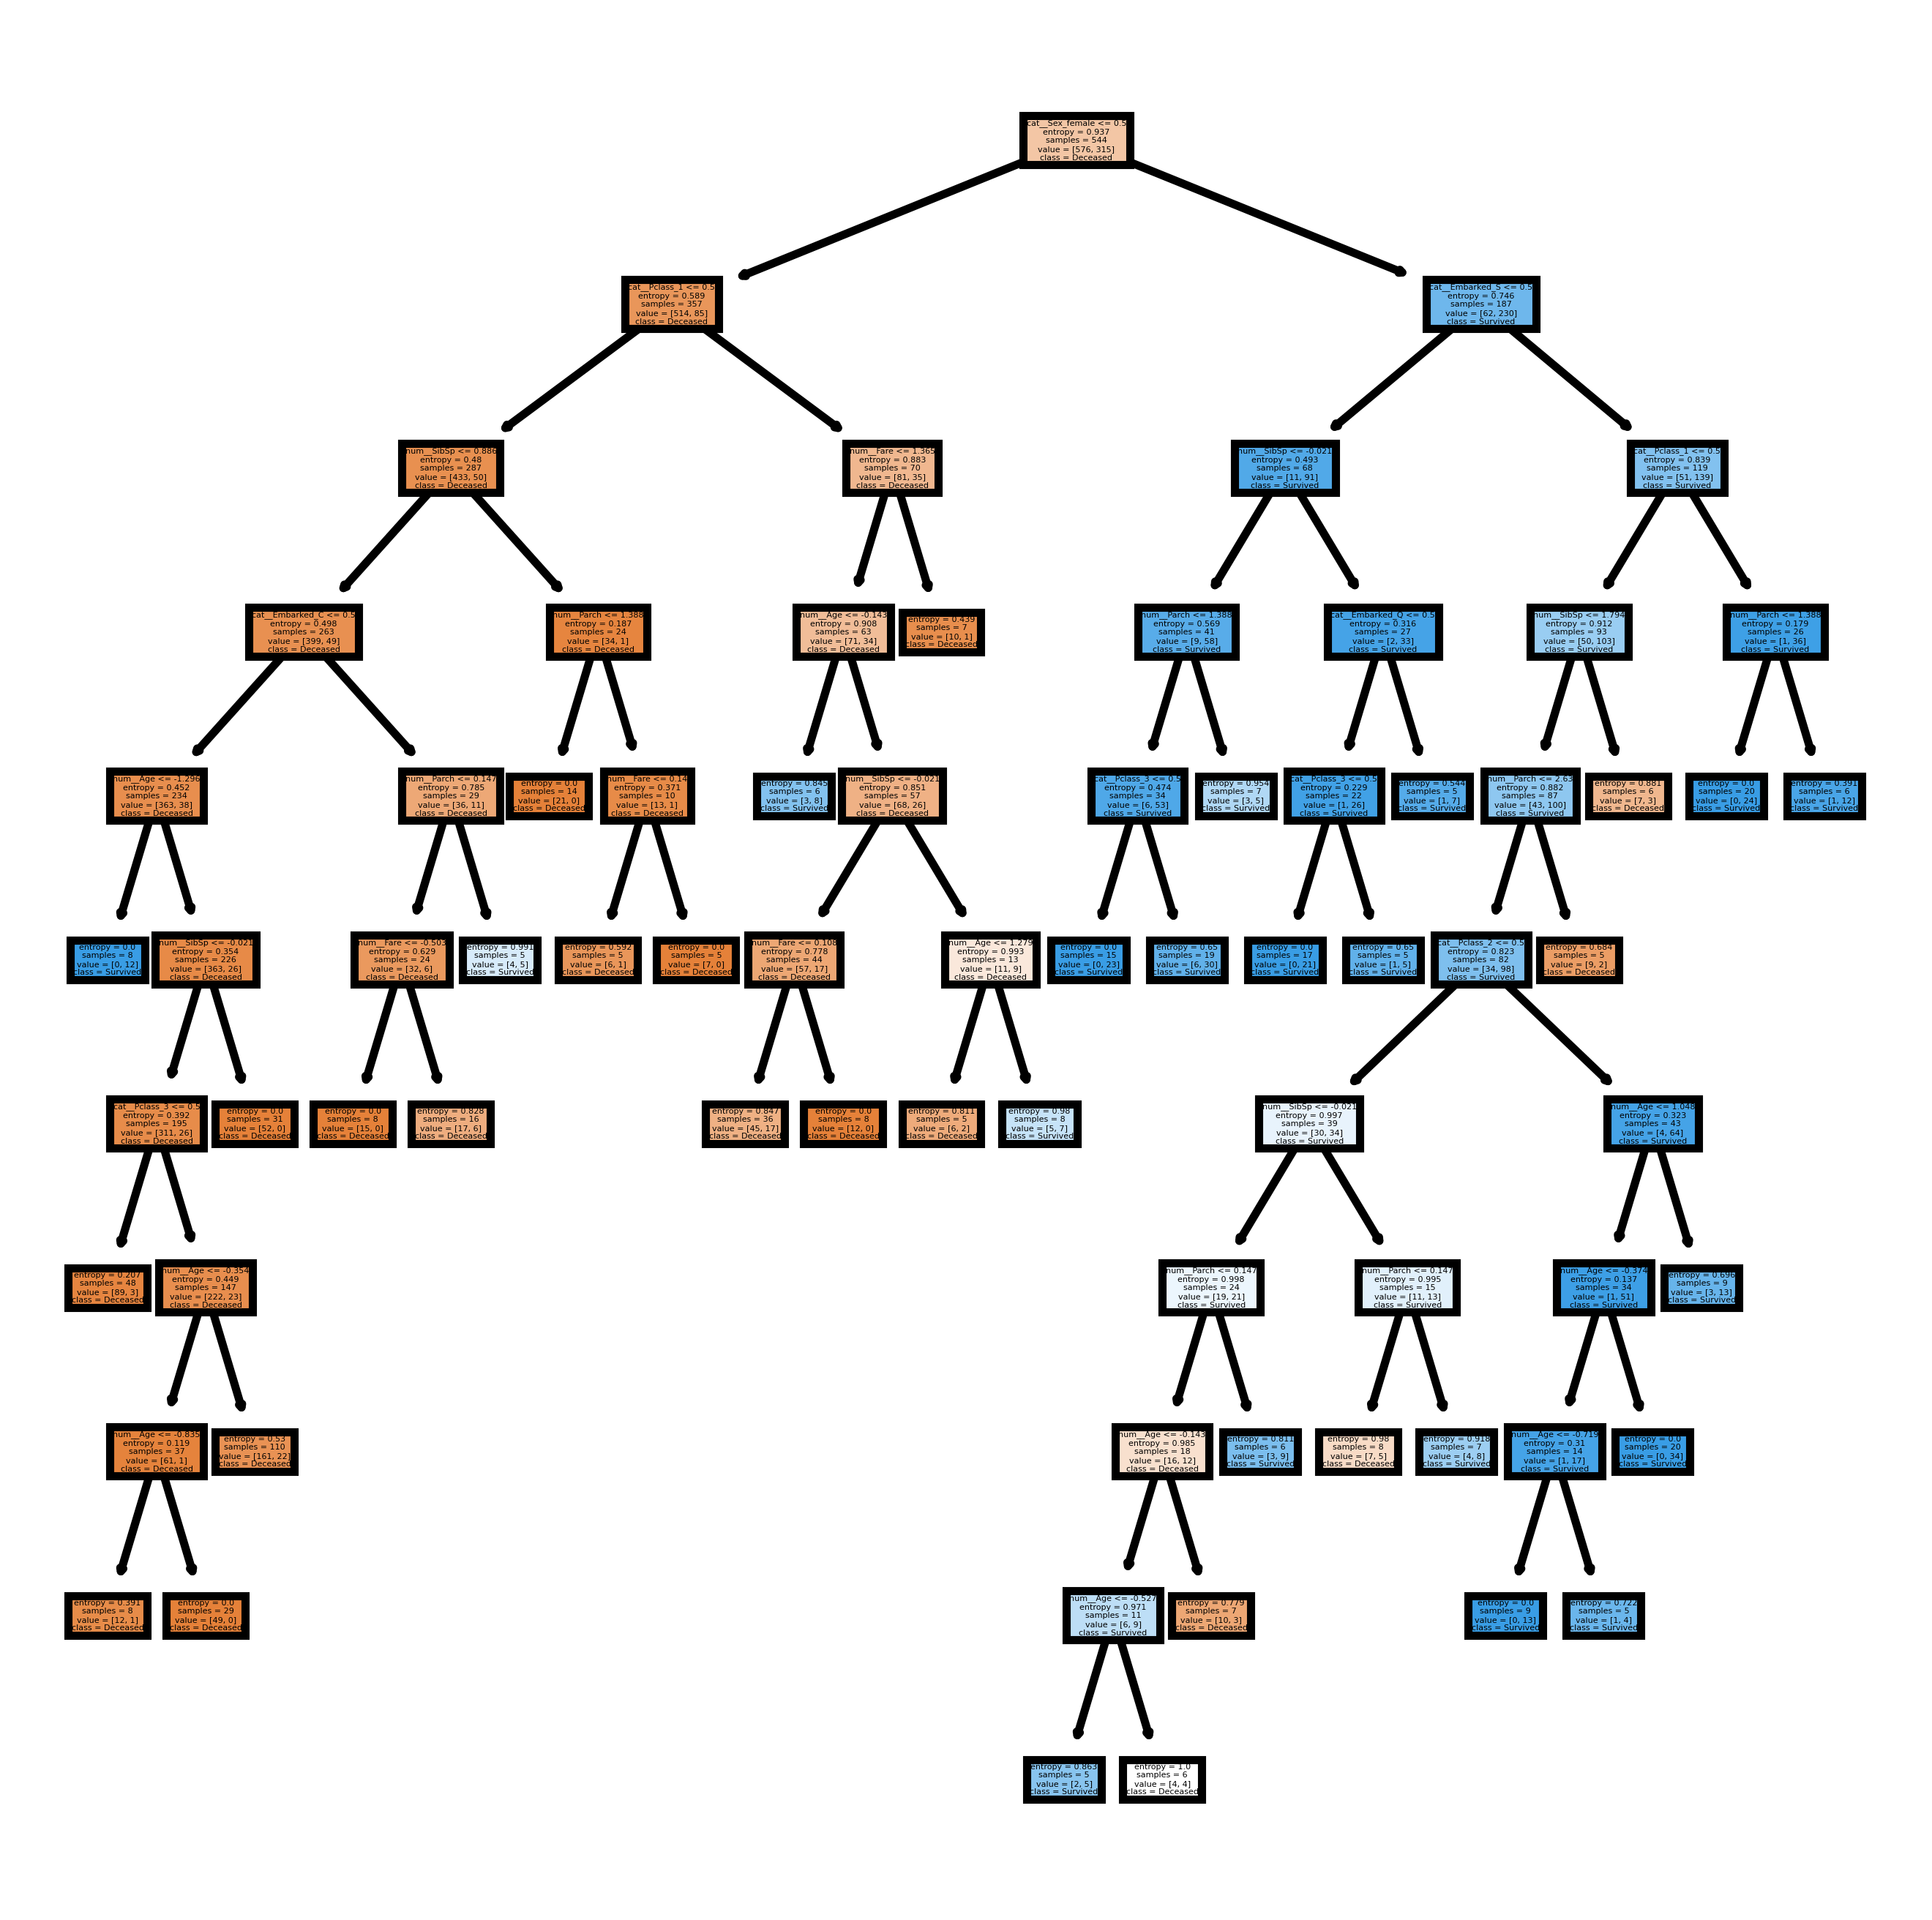

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(tree_model.estimators_[0],
               feature_names = feature_names,
               class_names = ['Deceased', 'Survived'],
               filled = True);
fig.savefig('rf_individualtree.png')

Przygotowanie test dataset

In [ ]:
test_data_raw = pd.read_csv('https://drive.google.com/uc?id=1Fb2Wpusr12im_UmHgY3Az1EWfB4KSfbf')
test_data_raw.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
PassengerId = test_data_raw['PassengerId']
X_test_train = test_data_raw.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

y_test_pred = best_estimator.predict(X_test_train)

submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_test_pred})

print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


https://www.kaggle.com/code/demidenkodmytro/pd4165

big forest
https://colab.research.google.com/drive/1AlR19uRyf1cK2nafiBigBxUQ-dIV6fkA?usp=sharing